In [135]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.layers import Input, Dense, Reshape,Embedding,dot
from tensorflow.keras.preprocessing.sequence import skipgrams
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
import collections
import numpy as np
from collections import defaultdict

## Data Reading & Pre-Processing

In this section, you will perform tokenization. The tokenization functions must divide the text into tokens, count their frequency and return a dictionary with a mapping of token to number.

Read in the dataset and write a function that returns four objects:
- A dictionary that maps each word to the number of times it occurs in the corpus.
- A dictionary that maps unique words in the corpus to a integer token value.
- An inverse dictionary that maps each token back to the corresponding word.
- A list which is the tokenized version of the sentence given in `raw_data`. Here each token is a number that can be mapped back to the appropriate word in the input.

In [136]:
# For this example, let us consider the sentence 
raw_data = "Shivas was hit by a red bus, so Pavlos rushed to the scene with a red scarf, \
but Chris and Marios did not rush to the scene and instead watched a movie"

# Convert the raw_data into a list of words separated by spaces
corpus = raw_data.lower().split()

In [137]:
def build_dataset(corpus):

  # Your code here
  tokenizer = tf.keras.preprocessing.text.Tokenizer()
  tokenizer.fit_on_texts(corpus)
  data = tokenizer.texts_to_sequences(corpus)
  tokenizer = tokenizer.word_index
  sorted_counts = collections.Counter(corpus)
  sorted_counts = dict(sorted_counts)
  inv_tokenizer = {v: k for k, v in tokenizer.items()}
  return sorted_counts, tokenizer, inv_tokenizer, data

In [138]:
counts, tokenizer, inv_tokenizer, data = build_dataset(corpus)

In [139]:
# print the original sentence
print(f'Original sentence is: "{" ".join(corpus)}"')

Original sentence is: "shivas was hit by a red bus, so pavlos rushed to the scene with a red scarf, but chris and marios did not rush to the scene and instead watched a movie"


In [140]:
# Print the list of tokenized words associated with this sentence
print(f'Tokenized sentence is: "{data}"')

Tokenized sentence is: "[[7], [8], [9], [10], [1], [2], [11], [12], [13], [14], [3], [4], [5], [15], [1], [2], [16], [17], [18], [6], [19], [20], [21], [22], [3], [4], [5], [6], [23], [24], [1], [25]]"


In [141]:
print(inv_tokenizer)

{1: 'a', 2: 'red', 3: 'to', 4: 'the', 5: 'scene', 6: 'and', 7: 'shivas', 8: 'was', 9: 'hit', 10: 'by', 11: 'bus', 12: 'so', 13: 'pavlos', 14: 'rushed', 15: 'with', 16: 'scarf', 17: 'but', 18: 'chris', 19: 'marios', 20: 'did', 21: 'not', 22: 'rush', 23: 'instead', 24: 'watched', 25: 'movie'}


In [142]:
# Print the sentence transformed from the tokenized list above
print(f'Tokenized sentence reversed is: {" ".join([inv_tokenizer[i[0]] for i in data])}')

Tokenized sentence reversed is: shivas was hit by a red bus so pavlos rushed to the scene with a red scarf but chris and marios did not rush to the scene and instead watched a movie


## Creating skip-grams with no negative samples

Recall what skipgrams are:

![alt text](https://storage.googleapis.com/public_colab_images/nlp/skip-gram.png)


<br>

- Use the `tf.keras.preprocessing.sequence.skipgrams()` function to create skipgrams of window size 3 without negative sampling. This method returns all the possible pairs of skip grams within the window_size defined.

In [143]:
vocab_size = len(tokenizer) + 1
print(vocab_size)

26


In [144]:
# We use the `skipgrams` function from tensorflow.keras
# to build the training dataset
from tensorflow.keras.preprocessing.sequence import skipgrams


#- Use the `tf.keras.preprocessing.sequence.skipgrams()` function to create skipgrams of window size 3 without negative sampling. This method returns all the possible pairs of skip grams within the window_size defined.
# Your code here
pairs, labels = skipgrams(data, vocab_size, window_size=3, negative_samples=0)
print(pairs)
print(labels)

[[[3], [21]], [[17], [18]], [[12], [3]], [[3], [22]], [[4], [1]], [[14], [5]], [[2], [5]], [[18], [2]], [[15], [3]], [[1], [11]], [[1], [12]], [[5], [15]], [[2], [9]], [[18], [17]], [[18], [6]], [[24], [25]], [[14], [4]], [[5], [24]], [[17], [16]], [[1], [5]], [[1], [2]], [[4], [14]], [[1], [8]], [[15], [16]], [[3], [5]], [[8], [1]], [[23], [24]], [[8], [10]], [[1], [9]], [[23], [25]], [[5], [6]], [[4], [5]], [[23], [4]], [[18], [16]], [[10], [7]], [[24], [23]], [[13], [14]], [[2], [18]], [[3], [12]], [[1], [15]], [[9], [1]], [[5], [4]], [[14], [12]], [[4], [3]], [[25], [23]], [[4], [13]], [[2], [15]], [[20], [19]], [[9], [2]], [[21], [6]], [[16], [18]], [[6], [5]], [[2], [1]], [[1], [6]], [[22], [3]], [[12], [11]], [[4], [3]], [[2], [17]], [[1], [24]], [[6], [24]], [[6], [21]], [[13], [3]], [[25], [1]], [[20], [22]], [[4], [5]], [[1], [2]], [[22], [20]], [[7], [8]], [[24], [6]], [[4], [23]], [[1], [16]], [[15], [2]], [[13], [2]], [[3], [4]], [[21], [4]], [[7], [9]], [[16], [1]], [[5],

In [145]:
# Separate the target,context pairs as word_target, word_context 
word_center, word_context = zip(*pairs)
print( word_center)
print( word_context)

([3], [17], [12], [3], [4], [14], [2], [18], [15], [1], [1], [5], [2], [18], [18], [24], [14], [5], [17], [1], [1], [4], [1], [15], [3], [8], [23], [8], [1], [23], [5], [4], [23], [18], [10], [24], [13], [2], [3], [1], [9], [5], [14], [4], [25], [4], [2], [20], [9], [21], [16], [6], [2], [1], [22], [12], [4], [2], [1], [6], [6], [13], [25], [20], [4], [1], [22], [7], [24], [4], [1], [15], [13], [3], [21], [7], [16], [5], [3], [7], [11], [14], [17], [6], [19], [22], [24], [5], [3], [10], [20], [12], [19], [15], [4], [10], [25], [13], [3], [1], [21], [8], [20], [3], [4], [3], [20], [12], [6], [1], [2], [12], [9], [14], [19], [13], [11], [19], [15], [6], [17], [3], [1], [6], [8], [23], [2], [6], [21], [10], [14], [17], [20], [11], [19], [6], [1], [21], [11], [5], [24], [2], [5], [22], [4], [9], [16], [5], [6], [5], [2], [12], [13], [22], [3], [16], [5], [2], [5], [10], [18], [4], [11], [9], [22], [19], [6], [21], [1], [10], [23], [16], [17], [18], [23], [16], [2], [6], [11], [15])
([21], 

In [146]:
print(type(word_center))

<class 'tuple'>


##  Training and building Word2Vec model using dense layers

Create and train another model that takes two words as input (center word and the context word) and outputs the probability of their occurrence in the same context window.

An example of the model architecture is:

![](https://drive.google.com/uc?export=view&id=1pOVKIitv_hm6tJB4Qb7vaV3K54VsyBQR)

In the above architecture, the input layers should take in one hot encoded representations of the center and context words. Choose the dense layer to be of size 300. The output of the model should have sigmoid activation function.

In [147]:
#In the above architecture, the input layers should take in one hot encoded representations of the center and context words. Choose the dense layer to be of size 300. The output of the model should have sigmoid activation function.
# Your code here
# the input is ont-hotted

input_target = Input((vocab_size,))
input_context = Input((vocab_size,))
target = Dense(300, activation='relu')(input_target)
target = Reshape((300, ))(target)
context = Dense(300, activation='relu')(input_context)
context = Reshape((300, ))(context)
dot_product = dot([target, context], axes=1)
dot_product = Reshape((1,))(dot_product)
output = Dense(1, activation='sigmoid')(dot_product)

In [148]:
# One-hot encode the input data

# Your code here
data_input_target = np.array(word_center)
data_input_context = np.array(word_context)
data_labels = np.array(labels)
data_input_target = to_categorical(data_input_target, num_classes=vocab_size)
data_input_context = to_categorical(data_input_context, num_classes=vocab_size)
# Compile the model
# Train the model
# Your code here
model = Model(inputs=[input_target, input_context], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = model.fit(x= (data_input_target, data_input_context), y=data_labels, batch_size=32, epochs=50, verbose=1)

Epoch 1/50


6/6 [==============================] - 0s 3ms/step - loss: 0.5138 - accuracy: 1.0000
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 1.0000
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 1.0000
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 1.0000
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2979 - accuracy: 1.0000
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2416 - accuracy: 1.0000
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1897 - accuracy: 1.0000
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1445 - accuracy: 1.0000
Epoch 9/50
6/6 [==============================] - 0s 2ms/step - loss: 0.1078 - accuracy: 1.0000
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0793 - accuracy: 1.0000
Epoch 11/50
6/6 [==============================] -

## Creating Skip-grams with negative samples

- Use the `build_dataset()` function defined in the previous section to get the counts, tokenier, inverse tokenizer and tokenized data from the new bugger corpus defined below.
- Use the tf.keras.preprocessing.sequence.skipgrams() function to create skipgrams of window size 3. This time, use negative sampling.

In [149]:
bigger_corpus = "Shivas was hit by a red bus, so Pavlos rushed to the scene with a red scarf, \
but Chris and Marios did not rush to the scene because of the circumstances. \
Instead they decided to chase after the car. Chris and Marios were also hurt \
when a red vehicle came running down a ramp in front of the building. \
Chris and Marios were then able to find a police officer and ran into the back of the building."

# Convert the raw_data into a list of words separated by spaces
bigger_corpus = bigger_corpus.lower().split()

In [150]:
# Your code here
counts, tokenizer, inv_tokenizer, data = build_dataset(bigger_corpus)
vocab_size = len(tokenizer) + 1
pairs, labels = skipgrams(data, vocab_size, window_size=3, negative_samples=1)
print(pairs)
print(labels)


[[[38], [5]], [[49], [50]], [[42], [1]], [[11], [51]], [[4], [34]], [[1], 2], [[31], 22], [[6], [10]], [[1], 9], [[5], 12], [[37], [39]], [[30], 13], [[30], [29]], [[25], 28], [[20], 49], [[8], 15], [[10], [34]], [[3], 37], [[14], 35], [[4], 28], [[4], 28], [[33], [32]], [[1], [33]], [[4], [7]], [[17], [2]], [[20], 30], [[28], [27]], [[32], 7], [[3], [19]], [[19], [16]], [[7], 44], [[6], [11]], [[1], 10], [[2], [21]], [[6], 36], [[24], 8], [[32], [1]], [[1], 47], [[3], [30]], [[1], 28], [[2], 6], [[51], 6], [[15], 13], [[1], 11], [[8], 36], [[18], [3]], [[2], [39]], [[30], [27]], [[33], 8], [[49], 41], [[24], 25], [[43], [1]], [[1], 13], [[5], [36]], [[42], [41]], [[27], [26]], [[27], [1]], [[30], [28]], [[35], 41], [[10], 40], [[45], 35], [[8], [11]], [[50], [1]], [[7], [6]], [[2], [40]], [[1], [51]], [[3], 48], [[8], 36], [[22], [7]], [[1], [9]], [[1], [8]], [[10], [6]], [[1], 38], [[51], [49]], [[5], [9]], [[20], [21]], [[49], [4]], [[43], 37], [[2], [16]], [[1], 30], [[1], 7], [[8]

In [151]:
word_center, word_context = zip(*pairs)
print( word_center)
print( word_context)
word_context = [i if type(i)==int else i[0] for i in word_context]
print(word_context)

([38], [49], [42], [11], [4], [1], [31], [6], [1], [5], [37], [30], [30], [25], [20], [8], [10], [3], [14], [4], [4], [33], [1], [4], [17], [20], [28], [32], [3], [19], [7], [6], [1], [2], [6], [24], [32], [1], [3], [1], [2], [51], [15], [1], [8], [18], [2], [30], [33], [49], [24], [43], [1], [5], [42], [27], [27], [30], [35], [10], [45], [8], [50], [7], [2], [1], [3], [8], [22], [1], [1], [10], [1], [51], [5], [20], [49], [43], [2], [1], [1], [8], [33], [3], [4], [30], [4], [9], [9], [17], [18], [29], [11], [48], [44], [16], [43], [17], [29], [6], [7], [16], [1], [11], [17], [16], [47], [3], [7], [16], [17], [24], [2], [4], [34], [25], [5], [5], [23], [5], [31], [9], [11], [11], [48], [6], [22], [2], [32], [4], [2], [4], [41], [33], [8], [37], [6], [34], [3], [3], [25], [11], [49], [2], [2], [7], [27], [24], [9], [40], [2], [12], [21], [14], [11], [7], [7], [3], [10], [8], [1], [35], [1], [8], [21], [38], [4], [7], [5], [50], [3], [27], [24], [9], [2], [51], [3], [1], [10], [12], [2],

## Training and building a Word2Vec model using embedding layer

Create and train another model that takes two words as input (center word and the context word) and outputs the probability of their occurrence in the same context window.

An example of the model architecture is

![](https://drive.google.com/uc?export=view&id=1ry3bzqdKcRKa2FU2jRiiPaFz59SjZxQl)

In the above architecture, the input layers should take in token representations of the center and context words instead of the one-hot encoded vectors. Choose the dense layer to be of size 300. The output of the model should have sigmoid activation function.

In [152]:
# In the above architecture, the input layers should take in token representations of the center and context words instead of the one-hot encoded vectors. Choose the dense layer to be of size 300. The output of the model should have sigmoid activation function.
# Your code here
input_target = Input((1,))
input_context = Input((1,))
embedding = Embedding(vocab_size, 300)
target = embedding(input_target)
target = Reshape((300, ))(target)
context = embedding(input_context)
context = Reshape((300, ))(context)
dot_product = dot([target, context], axes=1)
dot_product = Reshape((1,))(dot_product)
output = Dense(1, activation='sigmoid')(dot_product)

In [153]:
# Input data
# Your code here
data_input_target = np.array(word_center, dtype=np.int32)
data_input_context = np.array(word_context, dtype=np.int32)
data_labels = np.array(labels, dtype=np.int32)
# Compile the model

# Train the model
# Your code here
model = Model(inputs=[input_target, input_context], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model.fit(x= (data_input_target, data_input_context), y=data_labels, batch_size=32, epochs=50, verbose=1)

Epoch 1/50


29/29 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5384
Epoch 2/50
29/29 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.8191
Epoch 3/50
29/29 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.8399
Epoch 4/50
29/29 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.8355
Epoch 5/50
29/29 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.8322
Epoch 6/50
29/29 [==============================] - 0s 3ms/step - loss: 0.5752 - accuracy: 0.8224
Epoch 7/50
29/29 [==============================] - 0s 2ms/step - loss: 0.5396 - accuracy: 0.8268
Epoch 8/50
29/29 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.8289
Epoch 9/50
29/29 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.8311
Epoch 10/50
29/29 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.8487
Epoch 11/50
29/29 [===========

## Results
#### Mention your observations here, which model do you think is the better one?

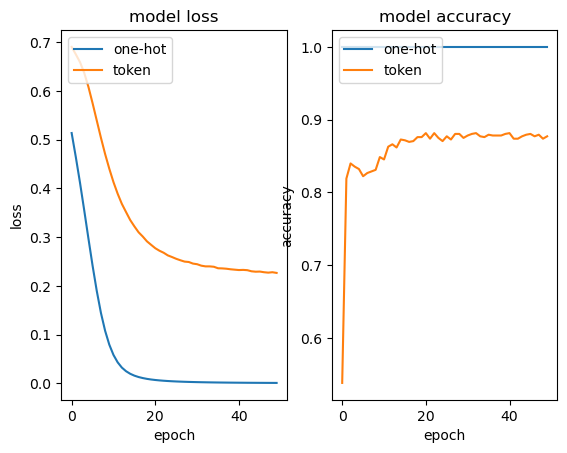

In [156]:
import matplotlib.pyplot as plt
#plot the loss and accuracy of the 2 models
# Your code here
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['one-hot', 'token'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['one-hot', 'token'], loc='upper left')
plt.show()

token model is better, because the one-hot one is in overfitting condition.